# ORTAM HAZIRLIGI

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Ayak-Classification

/content/drive/MyDrive/Colab Notebooks/Ayak-Classification


In [5]:
# ultralytics indir.
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# test

In [6]:
!yolo detect predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 67.7MB/s]
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 12.4MB/s]
image 1/1 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 308.7ms
Speed: 20.2ms preprocess, 308.7ms inference, 36.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# training


In [5]:
!unzip data/feet_dataset.zip -d ./data

Archive:  data/feet_dataset.zip
   creating: ./data/feet_dataset/images/
   creating: ./data/feet_dataset/images/test/
  inflating: ./data/feet_dataset/images/test/1.jpg  
  inflating: ./data/feet_dataset/images/test/12.jpg  
  inflating: ./data/feet_dataset/images/test/17.jpg  
  inflating: ./data/feet_dataset/images/test/19.jpg  
  inflating: ./data/feet_dataset/images/test/6.jpg  
   creating: ./data/feet_dataset/images/train/
  inflating: ./data/feet_dataset/images/train/10.jpg  
  inflating: ./data/feet_dataset/images/train/11.jpg  
  inflating: ./data/feet_dataset/images/train/13.jpg  
  inflating: ./data/feet_dataset/images/train/14.jpg  
  inflating: ./data/feet_dataset/images/train/15.jpg  
  inflating: ./data/feet_dataset/images/train/16.jpg  
  inflating: ./data/feet_dataset/images/train/18.jpg  
  inflating: ./data/feet_dataset/images/train/2.jpg  
  inflating: ./data/feet_dataset/images/train/20.jpg  
  inflating: ./data/feet_dataset/images/train/21.jpg  
  inflating: ./da

In [6]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=yolov8_feet_detection

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=25, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_feet_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

# ayak tespiti / prediction



In [8]:
!yolo detect predict model=runs/detect/yolov8_feet_detection/weights/best.pt source=test save=True

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/5 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/test/1.jpg: 640x640 (no detections), 8.8ms
image 2/5 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/test/12.jpg: 640x640 (no detections), 8.3ms
image 3/5 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/test/17.jpg: 640x640 (no detections), 11.9ms
image 4/5 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/test/19.jpg: 640x640 1 2, 7.4ms
image 5/5 /content/drive/MyDrive/Colab Notebooks/Ayak-Classification/test/6.jpg: 640x640 1 2, 7.4ms
Speed: 3.4ms preprocess, 8.8ms inference, 128.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict



0: 640x640 1 2, 10.7ms
Speed: 4.9ms preprocess, 10.7ms inference, 560.1ms postprocess per image at shape (1, 3, 640, 640)


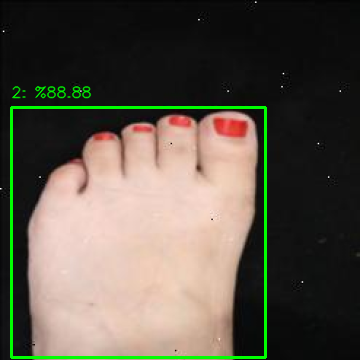

In [9]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "test/19.jpg"
model_path = "runs/detect/yolov8_feet_detection/weights/best.pt"

model = YOLO(model_path)

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

results = model(img)[0]
# print(results)

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  # print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"

    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA)

cv2_imshow(img)